## Questions:

Cells were recorded in up to 4 sessions.

### What percentage of cells is present across multiple sessions?

[all 4? 3? 2?]

### For cells present on 2/3 days, is there any patterning of the days that cells are present?

* Random?
* Cells only present during training or reversal?
* Cells only present during less (Session 2 & 7) or more (Session 6 & 9) reward certainty?

### Are these percentages/patterns affected by the drug treatment?

In [1]:
import os 
import pandas as pd
import numpy as np
from itertools import combinations, product
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
from scipy.stats import chi2_contingency

from lib import *

sessions = [2, 6, 7, 9]

fn_in = './data/input/explore.csv'
df = pd.read_csv(fn_in)
conditions = df.treatment.unique()

Number of cells by recording day

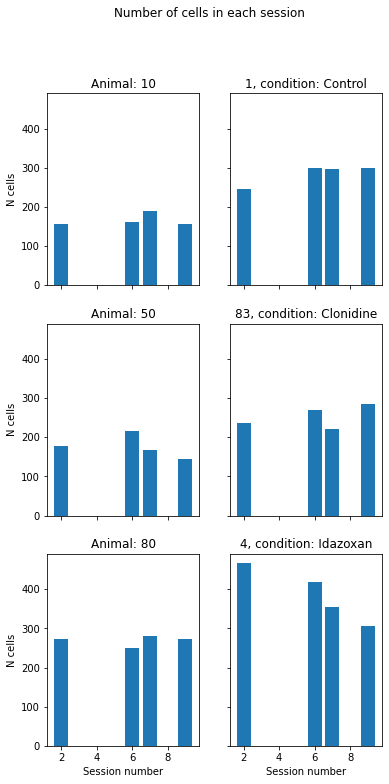

In [32]:
counts_by_day = np.zeros((3, 2, 4))
for i, cond in enumerate(conditions):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, cond)
    for j, animal in enumerate(animals):
        counts_by_day[i,j] = np.sum(np.stack(list(cell_stats[animal].values())), axis = 0)
        
fig, axes = plt.subplots(3,2, figsize = (6,12), sharex = True, sharey = True)
for i,j in product(range(3), range(2)):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[i])
    axes[i,j].bar(sessions, counts_by_day[i,j], label = ['2', '6', '7', '9'])
    if j == 0:
        axes[i,j].set_ylabel('N cells')
    title = f'Animal: {animals[j]}'
    if j == 1:
        title += f', condition: {conditions[i]}'
        title = title.replace('Animal: ', '')
    axes[i,j].set_title(title)
    if i == 2:
        axes[i,j].set_xlabel('Session number')
fig.suptitle("Number of cells in each session");

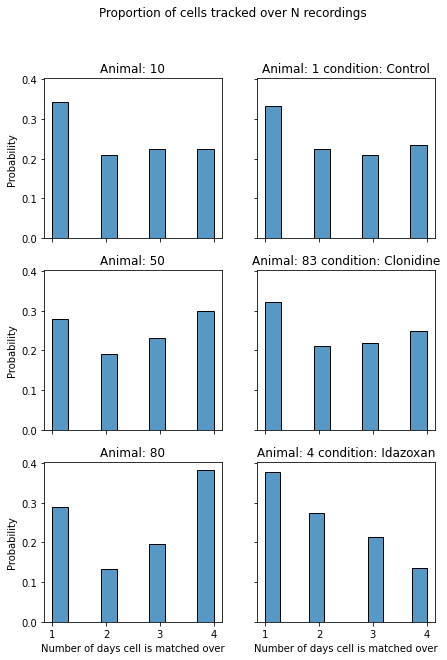

In [26]:
fig, axes = plt.subplots(3, 2, figsize = (7, 10), sharex = True, sharey = True)
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[0])
sns.histplot(cell_sums_list[animals[0]], ax = axes[0,0], stat = 'probability')
axes[0,0].set_title(f'Animal: {animals[0]}')
sns.histplot(cell_sums_list[animals[1]], ax = axes[0,1], stat = 'probability')
axes[0,1].set_title(f'Animal: {animals[1]} condition: {conditions[0]}')
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[1])
sns.histplot(cell_sums_list[animals[0]], ax = axes[1,0], stat = 'probability')
axes[1,0].set_title(f'Animal: {animals[0]}')
sns.histplot(cell_sums_list[animals[1]], ax = axes[1,1], stat = 'probability')
axes[1,1].set_title(f'Animal: {animals[1]} condition: {conditions[1]}')
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[2])
sns.histplot(cell_sums_list[animals[0]], ax = axes[2,0], stat = 'probability')
axes[2,0].set_title(f'Animal: {animals[0]}')
sns.histplot(cell_sums_list[animals[1]], ax = axes[2,1], stat = 'probability')
axes[2,1].set_title(f'Animal: {animals[1]} condition: {conditions[2]}')
axes[2,1].set_xlabel("Number of days cell is matched over")
axes[2,0].set_xlabel("Number of days cell is matched over")
fig.suptitle("Proportion of cells tracked over N recordings");

Pooling animals together:

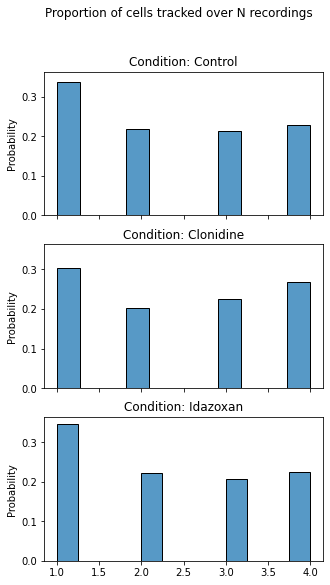

In [27]:
fig, axes = plt.subplots(3, 1, figsize = (5, 9), sharex = True, sharey = True)
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[0])
csl = cell_sums_list[animals[0]] + cell_sums_list[animals[1]]
sns.histplot(csl, ax = axes[0], stat = 'probability')
axes[0].set_title(f'Condition: {conditions[0]}')
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[1])
csl = cell_sums_list[animals[0]] + cell_sums_list[animals[1]]
sns.histplot(csl, ax = axes[1], stat = 'probability')
axes[1].set_title(f'Condition: {conditions[1]}')
cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[2])
csl = cell_sums_list[animals[0]] + cell_sums_list[animals[1]]
sns.histplot(csl, ax = axes[2], stat = 'probability')
axes[2].set_title(f'Condition: {conditions[2]}')
fig.suptitle("Proportion of cells tracked over N recordings");

Are these counts significantly different?

In [54]:
#Form contingency tables
contingencies = np.zeros((3,4))
for idx in range(3):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[idx])
    csl = cell_sums_list[animals[0]] + cell_sums_list[animals[1]]
    csl_counts = Counter(csl)
    csl_counts_ = [csl_counts[k] for k in range(1,5)]
    contingencies[idx,:] = csl_counts_
    
# Two-sample chi-square test
for i,j in combinations(range(3), 2):
    result = chi2_contingency(contingencies[[i,j],:])
    print(f'Chi2 test {conditions[i]} vs {conditions[j]}: {result[1]}')

Chi2 test Control vs Clonidine: 0.251428024411256
Chi2 test Control vs Idazoxan: 0.9543388503945165
Chi2 test Clonidine vs Idazoxan: 0.06222641610595609


*Not* significantly different.

How many cells are matched, at all, per session?

/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will ra

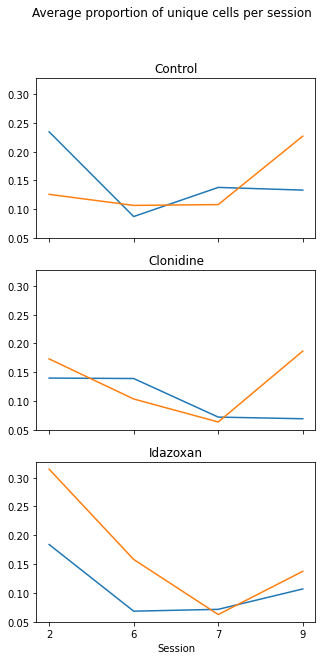

In [112]:
prop_unique_cells = np.zeros((3,2,4))
for i, cond in enumerate(conditions):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, cond)
    for j, animal in enumerate(animals): 
        animal_stats = np.stack(cell_stats[animal].values())
        for idx in range(len(sessions)):
            present_cells = animal_stats[:,idx] == 1
            non_idx = list(range(4))
            non_idx.remove(idx)
            unique_cells = animal_stats[:,non_idx].sum(axis = 1) == 0    
            n_unique_cells = sum(unique_cells)
            n_cells = sum(present_cells)
            prop_unique_cells[i,j,idx] = n_unique_cells/n_cells

fig, axes = plt.subplots(3,1,figsize = (5,10), sharex = True, sharey = True)
for i in range(3):
    axes[i].plot([1,2,3,4], prop_unique_cells[i,:,:].T)
    axes[i].set_xticklabels([2,6,7,9])
    axes[i].set_xticks(range(1,5))
    if i == 2:
        axes[i].set_xlabel('Session')
    axes[i].set_title(conditions[i])
fig.suptitle('Average proportion of unique cells per session');

Now, for each pair or recordings, what proportion of cells are matched between the recs?

/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/home/blansdel/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will ra

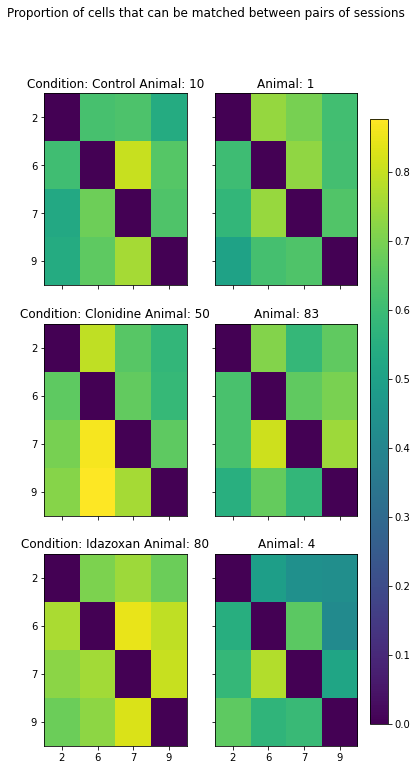

In [40]:
matching_matrix = np.zeros((3, 2, 4, 4))

for c_i, cond in enumerate(conditions):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, cond)
    for a_j, animal in enumerate(animals):
        animal_stats = np.stack(cell_stats[animal].values())

        #Of all cells present in s1, how many are present in s2?
        for s1, s2 in product(range(4), range(4)):
            if s1 == s2:
                matching_matrix[c_i, a_j, s1, s2] = 0
                continue
            a_stats = animal_stats[animal_stats[:,s1] == 1, s2]
            matching_matrix[c_i, a_j, s1, s2] = a_stats.sum()/a_stats.shape[0]
            
# find minimum of minima & maximum of maxima
minmin = np.min(matching_matrix)
maxmax = np.max(matching_matrix)

fig, axes = plt.subplots(3,2, figsize = (6,12), sharex = True, sharey = True)
for i,j in product(range(3), range(2)):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[i])

    ims = axes[i,j].imshow(matching_matrix[i,j,:,:], vmin = minmin, vmax = maxmax, aspect = 'auto')
    axes[i,j].set_xticks(range(4))
    axes[i,j].set_xticklabels(sessions)
    axes[i,j].set_yticks(range(4))
    axes[i,j].set_yticklabels(sessions)
    title = f'Animal: {animals[j]}'
    if j == 0:
        title = f'Condition: {conditions[i]} ' + title
    axes[i,j].set_title(title)
fig.suptitle("Proportion of cells that can be matched between pairs of sessions");
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(ims, cax=cbar_ax);

In [55]:
#Plot mean proportion as a function of days from the recording
#Take mean over animals
mean_matching_matrix = np.mean(matching_matrix, axis = 1)

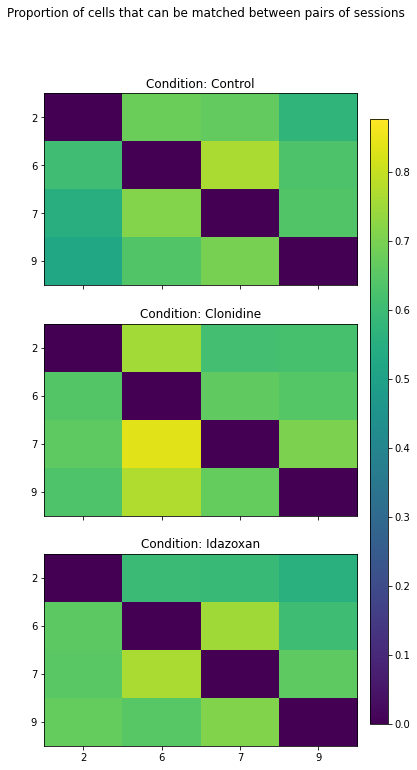

In [62]:
fig, axes = plt.subplots(3,1, figsize = (6,12), sharex = True, sharey = True)
for i in product(range(3)):
    cell_sums, cell_stats, cell_sums_list, animals = compute_stats(df, conditions[i])
    ims = axes[i].imshow(mean_matching_matrix[i,:,:].squeeze(), vmin = minmin, vmax = maxmax, aspect = 'auto')
    axes[i].set_xticks(range(4))
    axes[i].set_xticklabels(sessions)
    axes[i].set_yticks(range(4))
    axes[i].set_yticklabels(sessions)
    title = f'Condition: {conditions[i]}'
    axes[i].set_title(title)
fig.suptitle("Proportion of cells that can be matched between pairs of sessions");
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(ims, cax=cbar_ax);

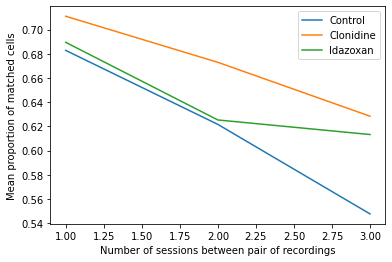

In [74]:
prop_n_from_rec = np.zeros((3,3))
n_from_rec = np.zeros((3,3))
for idx, cond in enumerate(conditions):
    for i,j in product(range(4), range(4)):
        if i == j: continue
        diff = abs(i-j)
        prop_n_from_rec[idx, diff-1] += mean_matching_matrix[idx, i, j]
        n_from_rec[idx,diff-1] += 1
mean_prop_n_from_rec = prop_n_from_rec/n_from_rec

plt.plot([1,2,3], mean_prop_n_from_rec.T)
plt.ylabel("Mean proportion of matched cells")
plt.xlabel("Number of sessions between pair of recordings");
plt.legend(conditions);

Can you match more cells in training? Or in reversal?